In [3]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [4]:
#initial read and print of motifs_dataframe
motifs_df = pd.read_csv("../rosetta_motifs/motifs_rmsds.csv")
motifs_df

,system,rmsd,placement_pdb
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...
...,...,...,...
80,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...
81,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...
82,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...
83,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...


In [5]:
#initial read and print of Schrodinger Glide dataframe
sg_df = pd.read_csv("../schrodinger_glide/glide_best_rmsd.csv")
sg_df

,system_name,best_rmsd,best_rmsd_pose,total_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [6]:
#rename schrodinger columns to be 'system', 'rmsd', 'best_pose', 'num_poses' like with motifs dataframe (initial .csv did not have header line)
sg_df.columns = ['system', 'rmsd', 'best_pose', 'num_poses']
#test print
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [7]:
sg_df = sg_df[sg_df['rmsd'].isna() == False]
sg_df

,system,rmsd,best_pose,num_poses
0,aa2ar,7.927534,13.0,15.0
1,abl1,0.424373,1.0,1.0
2,ace,3.781334,1.0,8.0
3,aces,0.638513,4.0,5.0
4,ada,1.452599,1.0,4.0
...,...,...,...,...
97,tysy,1.925273,4.0,4.0
98,urok,0.849532,1.0,5.0
99,vgfr2,1.357784,2.0,3.0
100,wee1,0.710819,6.0,6.0


In [8]:
#Inner join of motifs and autodock dataframes for plotting purposes; followed with test print
merged_df = pd.merge(motifs_df, sg_df, on='system', how='inner')
merged_df

,system,rmsd_x,placement_pdb,rmsd_y,best_pose,num_poses
0,aa2ar,4.147040,aa2ar_ResPos_159_ResID_PHE_Trio25_+_motif_1OU4...,7.927534,13.0,15.0
1,abl1,0.124568,abl1_ResPos_83_ResID_THR_Trio42_+_motif_6DWM_H...,0.424373,1.0,1.0
2,ace,0.407009,ace_ResPos_293_ResID_SER_Trio17_+_motif_7Q26_8...,3.781334,1.0,8.0
3,aces,0.133846,aces_ResPos_52_ResID_TRP_Trio65_+_motif_7AIX_8...,0.638513,4.0,5.0
4,ada,0.272664,ada_ResPos_151_ResID_MET_Trio38_+_motif_3UZC_T...,1.452599,1.0,4.0
...,...,...,...,...,...,...
79,thb,0.165592,thb_ResPos_115_ResID_LEU_Trio20_+_motif_4A6E_A...,2.085737,1.0,2.0
80,thrb,0.214373,thrb_ResPos_111_ResID_LEU_Trio18_+_motif_5AFJ_...,0.320517,1.0,1.0
81,tryb1,0.429380,tryb1_ResPos_209_ResID_GLU_Trio49_+_motif_5F6D...,0.933948,1.0,3.0
82,urok,0.160134,urok_ResPos_208_ResID_CYS_Trio60_+_motif_2A1D_...,0.849532,1.0,5.0


In [9]:
#drop non-needed columns from merged dataframe
merged_df = merged_df.drop(columns=['placement_pdb'])
merged_df = merged_df.drop(columns=['best_pose'])
merged_df = merged_df.drop(columns=['num_poses'])
#rename columns for rmsd from motifs and autodock
merged_df.columns = ['system', 'rmsd_motifs', 'rmsd_sg']
#test_print
merged_df

,system,rmsd_motifs,rmsd_sg
0,aa2ar,4.147040,7.927534
1,abl1,0.124568,0.424373
2,ace,0.407009,3.781334
3,aces,0.133846,0.638513
4,ada,0.272664,1.452599
...,...,...,...
79,thb,0.165592,2.085737
80,thrb,0.214373,0.320517
81,tryb1,0.429380,0.933948
82,urok,0.160134,0.849532


In [10]:
type(merged_df['rmsd_sg'][0])
type(merged_df['rmsd_motifs'][0])
print(merged_df['rmsd_sg'])

0     7.927534
1     0.424373
2     3.781334
3     0.638513
4     1.452599
        ...   
79    2.085737
80    0.320517
81    0.933948
82    0.849532
83    2.461600
Name: rmsd_sg, Length: 84, dtype: float64


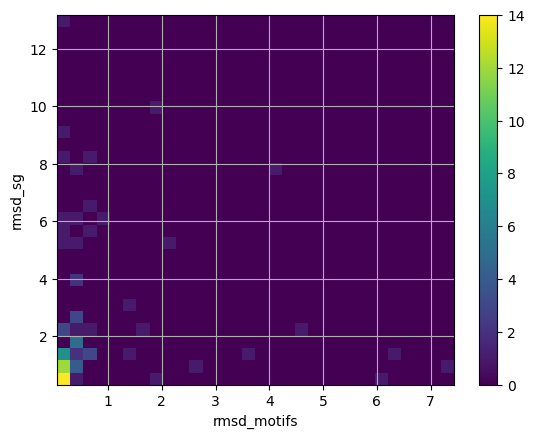

In [11]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs

#copy out rmsd columns of motifs and autodock
x = merged_df['rmsd_motifs']
y = merged_df['rmsd_sg']

#create a 2d histogram of the rmsd columns with 30 bins in each dimension
heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

#set plot labels
plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_sg')

#create 2d heatmap using viridis color scale
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', aspect='auto')

#add color bar
plt.colorbar()

#add grid
plt.grid(True)

#show plot
plt.show()

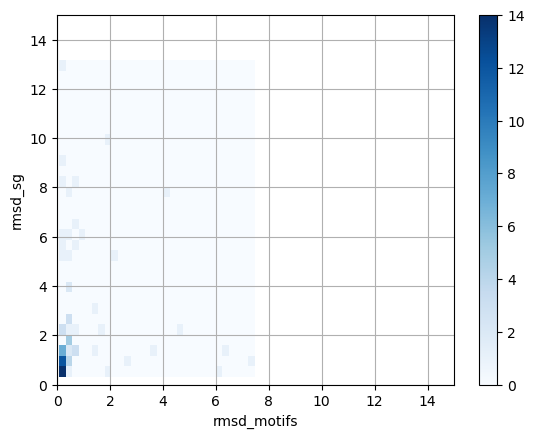

In [12]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = merged_df['rmsd_motifs']
y = merged_df['rmsd_sg']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_sg')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

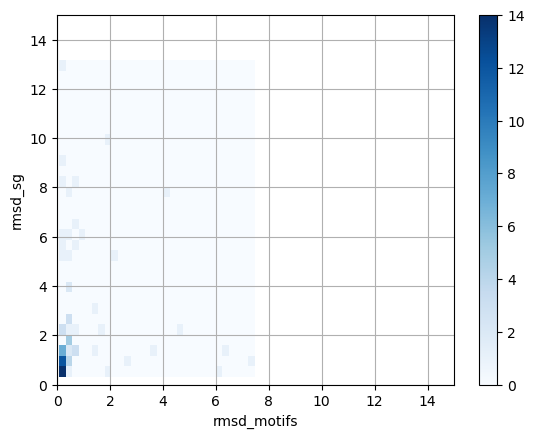

In [13]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = merged_df['rmsd_motifs']
y = merged_df['rmsd_sg']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('rmsd_motifs')
plt.ylabel('rmsd_sg')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

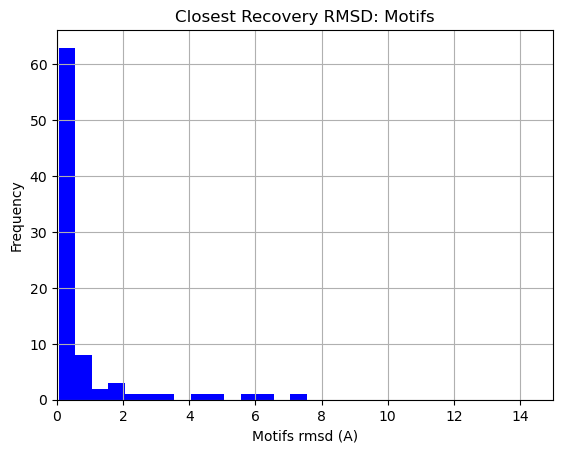

In [14]:
#create heatmap of Motifs closest recovery RMSDs

#extract motifs rmsds
x = merged_df['rmsd_motifs']
#set labels and title
plt.xlabel('Motifs rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: Motifs')
#create 30 bin 1D hsitogram
plt.xlim(0,15)
bin_edges = np.arange(min(x), max(x) + 0.5, 0.5)
plt.hist(x, bins=bin_edges, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

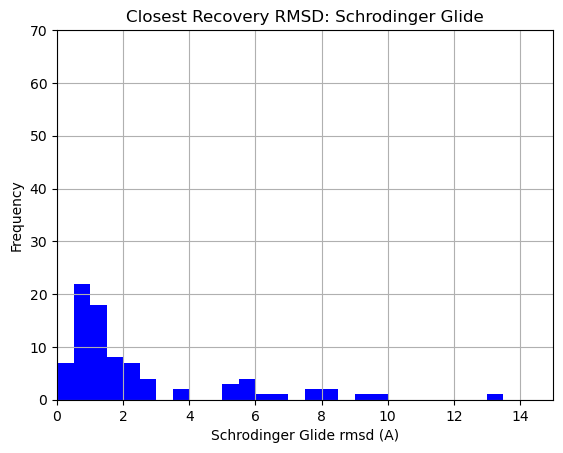

In [19]:
#create heatmap of Schrodinger closest recovery RMSDs

x = merged_df['rmsd_sg']
plt.xlabel('Schrodinger Glide rmsd (A)')
plt.ylabel('Frequency')
plt.title('Closest Recovery RMSD: Schrodinger Glide')
plt.xlim(0,15)
plt.ylim(0,70)
bin_edges = np.arange(0, max(x) + 0.5, 0.5)
plt.hist(x, bins=bin_edges, color='blue')
plt.grid(True)
plt.show()

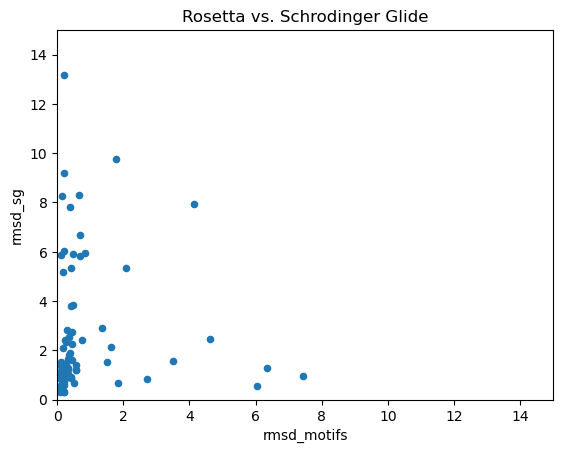

In [18]:
#make a scatterplot in the place of the heatmap
merged_df.plot(kind='scatter',x='rmsd_motifs',y='rmsd_sg')
plt.xlim(0,15)
plt.ylim(0,15)
plt.title("Rosetta vs. Schrodinger Glide")
plt.show()